# Visualising and analysing the tweeter users sentiments regarding renewable energy


## 1. Problem Definition

For this notebook, the problem we're trying to solve is,

> How well can we predict the sentiments of the german population in Hessen regarding renewable energy sources such as Wind and solar energy. 

## 2. Data

> The data/tweets used are from tweepy, which is a twitter APi.
https://www.tweepy.org/

**Features**
1. Text: the original tweet
2. cleaned: original tweet without any retweets, punctions and numbers
3. polarity: Polarity is a float value within the range [-1.0 to 1.0] where 0 indicates neutral, +1 indicates a very positive sentiment and -1 represents a very negative sentiment
4. subjectivity: Subjectivity is a float value within the range [0.0 to 1.0] where 0.0 is very objective and 1.0 is very subjective.
5. sentiment: the overall sentiment of the tweet
6. neg: negative sentiment
7. pos: positive sentiment
8. neu: neutral sentiment
9. compound: normalised sum of postive, negative and neutral sentiment within the range of -1(most extreme negative) and +1 (most extreme positive)
10. text_len: the total characters in the cleaned tweet 
11. text_word_count: total number of words in cleaned tweet
12. tokenized: tokenized words from the cleaned tweet
13. lemmatized: synonyms of the cleaned tweet
14. Without stopwords: cleaned tweet without any meaningless words like der, die, das and so on.									

### Downloading and importing necessary packages

In [165]:
!pip install bertopic

!pip install wordcloud

!pip install textblob
!pip install textblob-de

!pip install germansentiment

!pip install keybert

!pip install flair

!pip install keyphrase_vectorizers

!pip install bertopic[spacy]

!pip install tweepy

^C
  Using cached bertopic-0.12.0-py2.py3-none-any.whl (90 kB)
  Using cached plotly-5.10.0-py2.py3-none-any.whl (15.2 MB)
  Using cached pandas-1.5.0-cp38-cp38-win_amd64.whl (11.0 MB)
  Using cached hdbscan-0.8.28.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Processing c:\users\ayush\appdata\local\pip\cache\wheels\a9\3a\67\06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea\umap_learn-0.5.3-py3-none-any.whl
  Using cached PyYAML-5.4.1-cp38-cp38-win_amd64.whl (213 kB)
  Using cached tenacity-8.1.0-py3-none-any.whl (23 kB)
Processing c:\users\ayush\appdata\local\pip\cache\wheels\1b\38\fe\99e22fbae88abd1c5e8d99253cba6d1c590cc7a94408bff3bf\pynndescent-0.5.7-py3-none-any.whl
  Using cached numba-0.56.2-cp38-cp38-

  ERROR: Command errored out with exit status 1:
   command: 'D:\machine_learning_project_folder\env\python.exe' 'D:\machine_learning_project_folder\env\lib\site-packages\pip\_vendor\pep517\_in_process.py' build_wheel 'C:\Users\ayush\AppData\Local\Temp\tmp5ejuo6ao'
       cwd: C:\Users\ayush\AppData\Local\Temp\pip-install-3gq78h_z\hdbscan
  Complete output (40 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-38
  creating build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\flat.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\hdbscan_.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\plots.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\prediction.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\robust_single_linkage_.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\validity.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\__in

^C


  Using cached bertopic-0.12.0-py2.py3-none-any.whl (90 kB)
Processing c:\users\ayush\appdata\local\pip\cache\wheels\a9\3a\67\06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea\umap_learn-0.5.3-py3-none-any.whl
  Using cached pandas-1.5.0-cp38-cp38-win_amd64.whl (11.0 MB)
  Using cached PyYAML-5.4.1-cp38-cp38-win_amd64.whl (213 kB)
  Using cached hdbscan-0.8.28.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached plotly-5.10.0-py2.py3-none-any.whl (15.2 MB)
  Using cached numba-0.56.2-cp38-cp38-win_amd64.whl (2.5 MB)
Processing c:\users\ayush\appdata\local\pip\cache\wheels\1b\38\fe\99e22fbae88abd1c5e8d99253cba6d1c590cc7a94408bff3bf\pynndescent-0.5.7-py3-none-any.whl
  Using cached tenacity-8.1.0-py3-n

  ERROR: Command errored out with exit status 1:
   command: 'D:\machine_learning_project_folder\env\python.exe' 'D:\machine_learning_project_folder\env\lib\site-packages\pip\_vendor\pep517\_in_process.py' build_wheel 'C:\Users\ayush\AppData\Local\Temp\tmpv0syx2u4'
       cwd: C:\Users\ayush\AppData\Local\Temp\pip-install-3orf7gx6\hdbscan
  Complete output (40 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-38
  creating build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\flat.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\hdbscan_.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\plots.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\prediction.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\robust_single_linkage_.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\validity.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\__in

In [6]:
import pandas as pd
# from bertopic import BERTopic
import text2emotion as te
from textblob_de import TextBlobDE
from germansentiment import SentimentModel
from keybert import KeyBERT
from flair.embeddings import TransformerDocumentEmbeddings
from keyphrase_vectorizers import KeyphraseCountVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import spacy

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
import tweepy
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import sys

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Twitter API Configuration

In [8]:
# If we have a text file, where all of our twitter keys are stored
mykeys = open('twitterkeys.txt','r').read().splitlines()
api_key = mykeys[0]
api_key_secret = mykeys[1]
access_token = mykeys[2]
access_token_secret = mykeys[3]

In [9]:
# Manual insertion of keys
api_key = 'Zy2TSFyxfkbXOYJcu1w8V8ywH'
api_key_secret='i6d9G34P76pR6BhDKEOkECO9zjKtLeSQTMUDjLdE0FyhBhxpkA'
access_token='1105189981780393985-kUU09Ng9jmceOi8z7Bb29SZaWaNVW6'
access_token_secret='4RGVe27RUo351lofWPV5kRphWmbeUe5MOJjK7UZP2Mshj'

In [10]:
from tweepy.auth import OAuthHandler
auth_handler = OAuthHandler(consumer_key=api_key,consumer_secret=api_key_secret)
auth_handler.set_access_token(access_token,access_token_secret)
# api = tweepy.API(auth_handler) This interface is for v1.1

**Twitter Authentication**

In [6]:
client = tweepy.Client(bearer_token="AAAAAAAAAAAAAAAAAAAAAKW3hQEAAAAA6R6Jmu819g9982%2B47kaqY%2Bejvxk%3DwQnK4IaPwnxbGjVv6G8hlp9XEhvqcp2xHEbAEsEZ8t3NeJ50ST")

### Get recent public tweets 

In [7]:
query = '#Windenergie -is:retweet lang:de',
'#Hessen Windenergie -is:retweet lang:de',
'#Hessen Windkraft -is:retweet lang:de', 
'#Hessen Windanlage -is:retweet lang:de',
'#Hessen Windpark -is:retweet lang:de',
'#Hessen Windrad -is:retweet lang:de' ,
'#Hessen Photovoltaik -is:retweet lang:de',
'#Hessen Photovoltaikpark -is:retweet lang:de',
'#Hessen Photovoltaikanlage -is:retweet lang:de'

paginator = tweepy.Paginator(client.search_recent_tweets,
                            query = "#Windenergie -is:retweet lang:de",
                            max_results = 100,
                            limit = 10)
tweet_list = []
for tweet in paginator.flatten():
    tweet_list.append(tweet)
    print(tweet)
    

Offshore-Windpark mit Windturbinen im Nordmeer, atlantischer https://t.co/Bg8MvxkAZ1 #windpark #offshore #turbinen #Ökologie #Umwelt #nordsee #Stromausfall #BadenBaden #Windrad #windrad #rotor #Windenergie #Energie #Energiekrise #Öl #Gas #tanken #Inflation #Ukraine #Sanktionen
@jensspahn Ach Herr Spahn.
Ihre Union hat sich 2011 diesen Atomausstieg ausgedacht.
Ihre Union 2017 den #Windenergie-Ausbau abgewürgt, obwohl sie wusste, dass man 2021+2022 sechs AKWs abschaltet.
Ich finde Sie sollten sich zuerst für diese unsinnige Politik entschuldigen.
@HubertAiwanger 1. Lützerath ist nicht "der Norden", sondern liegt im Westen.
2. Kohleverstromung wird nicht ausgeweitet, Kohleausstieg wird um 8 Jahre vorgezogen.
3. Bayern hat ein Problem nicht wegen fehlender Kohlekraftwerke,  sondern wegen zu wenig #Windenergie-Anlagen.
4. Sie sind peinlich.
@HubertAiwanger Die Stromautobahnen, die #Windenergie nach #Bayern bringen sollen, werden nicht vor 2025 fertig. Könnt euch bei der CSU bedanken...
Das 

Gute Zahlen 🙂 - schlechte Zahlen 😳
Umsatzwachstum ≠ Gewinnwachstum 
#Nordex  #Why ? #Erneuerbare #Windenergie https://t.co/ePFvys9Es5
Der Windanlagenbauer @SiemensGamesa leidet unter hohen Kosten und Materialengpässen. Siemens will die Spanier nun komplett übernehmen und ein schlankeres Entwicklungsteam über alle Plattformen hinweg. #Windenergie 
https://t.co/YGnGNqpAgd
@Markus_Soeder @verbund @ThorstenGlauber @MartinHuberCSU Wird ja auch Mal Zeit, dass man sich anderweitig umschaut. Laut #Habeck scheint ja nur #windenergie das non plus ultra zu sein.
@Markus_Soeder @TUM_Hyperloop @TU_Muenchen @MarkusBlume Keine Science-Fiction und trotzdem nicht real: Windkrafträder in Bayern

#Windkraft #Windenergie #Windkrafanlage #Energiewende #Energiekrise #Bayern #CSU #Söder
Falls Ihr @BengtBergt noch nicht kennt. Einer der guten Energiepolitiker aus der SPD-Fraktion, der es schafft erneuerbare Energien auch aus sozialdemokratischer Perspektive zu denken. #energie #uniper #windenergie https://t.c

In [8]:
# creating new dataframe and new features
tweet_list_df = pd.DataFrame(tweet_list)
tweet_list_df = pd.DataFrame(tweet_list_df["text"])
tweet_list_df.head()

,text
0,Offshore-Windpark mit Windturbinen im Nordmeer...
1,@jensspahn Ach Herr Spahn.\nIhre Union hat sic...
2,"@HubertAiwanger 1. Lützerath ist nicht ""der No..."
3,"@HubertAiwanger Die Stromautobahnen, die #Wind..."
4,Das war am 07.06.2016!!!!!\nDie Stromautobahne...


## Data preprocessing

In [9]:
def preprocess_tweet(sen):
    """ Cleans text data up,leaving only 2 or more char long non-stopwords composed of 
    A-Z & a-z only in lower case"""
    sentence = sen.lower()
    # remove RT
    sentence = re.sub('RT @ \w+: '," ", sentence)
    # remove punctuation and numbers
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z\t])|(\w+:\/\/\$+)"," ", sentence)
    # single character removel
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    # remove multiple spaces
    sentence = re.sub(r'\s+',' ',sentence)
    return sentence
    

In [10]:
cleaned_tweets = []
for tweet in tweet_list_df['text']:
    cleaned_tweet = preprocess_tweet(tweet)
    cleaned_tweets.append(cleaned_tweet)

In [11]:
tweet_list_df['cleaned'] = pd.DataFrame(cleaned_tweets)
tweet_list_df.head()

,text,cleaned
0,Offshore-Windpark mit Windturbinen im Nordmeer...,offshore windpark mit windturbinen im nordmeer...
1,@jensspahn Ach Herr Spahn.\nIhre Union hat sic...,ach herr spahn ihre union hat sich 2011 diese...
2,"@HubertAiwanger 1. Lützerath ist nicht ""der No...",1 tzerath ist nicht der norden sondern liegt ...
3,"@HubertAiwanger Die Stromautobahnen, die #Wind...",die stromautobahnen die windenergie nach baye...
4,Das war am 07.06.2016!!!!!\nDie Stromautobahne...,das war am 07 06 2016 die stromautobahnen die ...


###  Removing stopwords

In [12]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('german'))
stop_words.add("https")

In [13]:
tweet_list_df["Without stopwords"] = tweet_list_df["cleaned"].apply(lambda Text: " ".join([word for word in Text.split() if word not in (stop_words)]))

tweet_list_df.head()

,text,cleaned,Without stopwords
0,Offshore-Windpark mit Windturbinen im Nordmeer...,offshore windpark mit windturbinen im nordmeer...,offshore windpark windturbinen nordmeer atlant...
1,@jensspahn Ach Herr Spahn.\nIhre Union hat sic...,ach herr spahn ihre union hat sich 2011 diese...,ach herr spahn union 2011 atomausstieg ausgeda...
2,"@HubertAiwanger 1. Lützerath ist nicht ""der No...",1 tzerath ist nicht der norden sondern liegt ...,1 tzerath norden liegt westen 2 kohleverstromu...
3,"@HubertAiwanger Die Stromautobahnen, die #Wind...",die stromautobahnen die windenergie nach baye...,stromautobahnen windenergie bayern bringen sol...
4,Das war am 07.06.2016!!!!!\nDie Stromautobahne...,das war am 07 06 2016 die stromautobahnen die ...,07 06 2016 stromautobahnen windenergie bayern ...


## Generate Sentiment Labels Without Any Stopwords

In [14]:
# def getSubjectivity(text):
#     return TextBlob(text).sentiment.subjectivity
  
# #Create a function to get the polarity
# def getPolarity(text):
#     return TextBlob(text).sentiment.polarity
  
#  #Create two new columns ‘Subjectivity’ & ‘Polarity’
# tweet_list_df["Subjectivity"] = tweet_list_df["Without stopwords"].apply(getSubjectivity)
# tweet_list_df["Polarity"] = tweet_list_df["Without stopwords"].apply(getPolarity)
# def getAnalysis(score):
#     if score < 0:
#         return 'Negative'
#     elif score == 0:
#         return 'Neutral'
#     else:
#         return 'Positive'
# tweet_list_df["Analysis"] = tweet_list_df["Polarity"].apply(getAnalysis)

In [15]:
# Problems:
# SentimentIntensityAnalyser() works with english language
# So no neg, positive and neutral scores are being calculated
# The previous step of lowercasing all the text made it difficult to differentiate between verbs and nouns in german

In [92]:
from textblob_de import TextBlobDE
tweet_list_df[['polarity','subjectivity']] = tweet_list_df['Without stopwords'].apply((lambda Text: pd.Series(TextBlobDE(Text).sentiment)))
for column, content in tweet_list_df['Without stopwords'].items():
    
    score = SentimentIntensityAnalyzer().polarity_scores(content)  # problem gervader # are not being calculated
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.333:
        tweet_list_df.loc[column, 'sentiment'] = "negative"
    elif comp >= 0.333:
        tweet_list_df.loc[column,'sentiment'] = "positive"
    else:
        tweet_list_df.loc[column,'sentiment'] = "neutral"
tweet_list_df.loc[column,'neg'] = neg
tweet_list_df.loc[column,'pos'] = pos
tweet_list_df.loc[column,'neu'] = neu
tweet_list_df.loc[column,'compound'] = comp
    
tweet_list_df.head(15)

,text,cleaned,Without stopwords,polarity,subjectivity,sentiment,neg,pos,neu,compound
0,Offshore-Windpark mit Windturbinen im Nordmeer...,offshore windpark mit windturbinen im nordmeer...,offshore windpark windturbinen nordmeer atlant...,0.000,0.00,neutral,NaN,NaN,NaN,NaN
1,@jensspahn Ach Herr Spahn.\nIhre Union hat sic...,ach herr spahn ihre union hat sich 2011 diese...,ach herr spahn union 2011 atomausstieg ausgeda...,0.000,0.00,neutral,NaN,NaN,NaN,NaN
2,"@HubertAiwanger 1. Lützerath ist nicht ""der No...",1 tzerath ist nicht der norden sondern liegt ...,1 tzerath norden liegt westen 2 kohleverstromu...,-0.350,0.50,negative,NaN,NaN,NaN,NaN
3,"@HubertAiwanger Die Stromautobahnen, die #Wind...",die stromautobahnen die windenergie nach baye...,stromautobahnen windenergie bayern bringen sol...,-0.150,0.00,neutral,NaN,NaN,NaN,NaN
4,Das war am 07.06.2016!!!!!\nDie Stromautobahne...,das war am 07 06 2016 die stromautobahnen die ...,07 06 2016 stromautobahnen windenergie bayern ...,-1.000,0.00,neutral,NaN,NaN,NaN,NaN
5,"Der Wind, der Wind... sorgt gerade für ganz sc...",der wind der wind sorgt gerade r ganz sch viel...,wind wind sorgt gerade r ganz sch gr nen strom...,0.700,0.00,neutral,NaN,NaN,NaN,NaN
6,"Netter Versuch Markus,\nBayern setzt also fast...",netter versuch markus bayern setzt also fast a...,netter versuch markus bayern setzt fast aussch...,0.500,0.50,neutral,NaN,NaN,NaN,NaN
7,@DerGraslutscher @Volksverpetzer Das Problem i...,das problem ist dass frau merkel in ihrem une...,problem frau merkel unermesslichen ratschluss ...,0.000,0.00,negative,NaN,NaN,NaN,NaN
8,Deutschland und die #windenergie .\nEs bleibt ...,deutschland und die windenergie es bleibt sehr...,deutschland windenergie bleibt schwierig co te...,-0.700,0.00,neutral,NaN,NaN,NaN,NaN
9,"#KemfertsKlimaPodcast: ich erläutere, was beim...",kemfertsklimapodcast ich erl utere was beim g...,kemfertsklimapodcast erl utere beim gaspreisde...,1.000,0.00,neutral,NaN,NaN,NaN,NaN


# Sentiment Visualisation 

In [93]:
# creating new data frames for all sentiments (positive,negative and neutal)
tweet_list_df_negative = tweet_list_df[tweet_list_df["sentiment"] == "negative"]
tweet_list_df_positive = tweet_list_df[tweet_list_df["sentiment"] == "positive"]
tweet_list_df_neutral = tweet_list_df[tweet_list_df["sentiment"] == "neutral"]

### Donut charts

In [94]:
#Function for count_values_in single columns
def count_values_in_column(data,feature):
    total = data.loc[:,feature].value_counts(dropna = False)
    percentage = round(data.loc[:,feature].value_counts(dropna= False,normalize = True)*100,2)
    return pd.concat([total,percentage],axis = 1, keys = ['Total','Percentage'])

In [95]:
# count values for sentiments
count_values_in_column(tweet_list_df,"sentiment")

,Total,Percentage
neutral,158,93.49
positive,9,5.33
negative,2,1.18


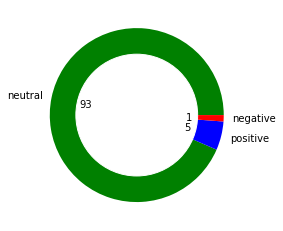

In [96]:
import matplotlib.pyplot as plt
#Create data for Pie Chart
pichart = count_values_in_column(tweet_list_df,"sentiment")
# names = pc.index
# size = pc["Percentage"]
names = pichart.index
values = pichart["Percentage"]

#Create a circle for the center of the plot
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(values,labels = names, colors = ['green','blue','red'], autopct= lambda x: '{:.0f}'.format(x*values.sum()/100))
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Word Cloud

In [97]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/Project9_TwitterAPI_Sentiments
# !ls

In [98]:
# Function to create Wordcloud
def create_wordcloud(text):
    # create and generate a word cloud Image
    wordcloud = WordCloud().generate(text)
    # dispaly the generated Image
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.figure(figsize= [8,10])
    plt.axis
    plt.show()

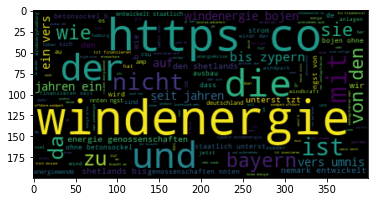

<Figure size 576x720 with 0 Axes>

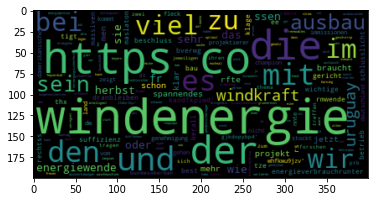

<Figure size 576x720 with 0 Axes>

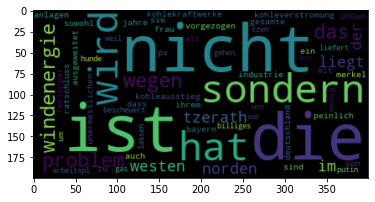

<Figure size 576x720 with 0 Axes>

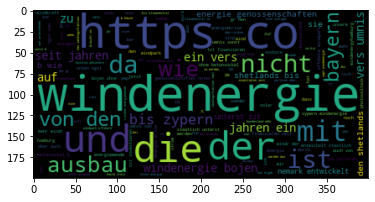

<Figure size 576x720 with 0 Axes>

In [99]:
# Creating wordcloud for all tweets
create_wordcloud(str(tweet_list_df["cleaned"].values))
create_wordcloud(str(tweet_list_df_positive["cleaned"].values))
create_wordcloud(str(tweet_list_df_negative["cleaned"].values))
create_wordcloud(str(tweet_list_df_neutral["cleaned"].values))

**Analysis using TFID**

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
vectorizer=TfidfVectorizer()
vectorizer.fit(tweet_list_df["Without stopwords"])
print(vectorizer.idf_)
print(vectorizer.vocabulary_) #summarize "

[5.03718615 5.44265126 5.44265126 ... 5.44265126 5.44265126 3.091276  ]
{'offshore': 1035, 'windpark': 1594, 'windturbinen': 1602, 'nordmeer': 1014, 'atlantischer': 137, 'co': 329, 'bg8mvxkaz1': 245, 'turbinen': 1422, 'kologie': 808, 'umwelt': 1449, 'nordsee': 1016, 'stromausfall': 1339, 'badenbaden': 181, 'windrad': 1598, 'rotor': 1194, 'windenergie': 1581, 'energie': 429, 'energiekrise': 433, 'gas': 576, 'tanken': 1369, 'inflation': 735, 'ukraine': 1436, 'sanktionen': 1214, 'ach': 80, 'herr': 690, 'spahn': 1298, 'union': 1455, '2011': 20, 'atomausstieg': 138, 'ausgedacht': 157, '2017': 23, 'ausbau': 152, 'abgew': 69, 'rgt': 1171, 'obwohl': 1030, 'wusste': 1619, '2021': 25, '2022': 26, 'sechs': 1246, 'akws': 90, 'abschaltet': 75, 'finde': 537, 'sollten': 1287, 'zuerst': 1641, 'unsinnige': 1461, 'politik': 1079, 'entschuldigen': 452, 'tzerath': 1429, 'norden': 1012, 'liegt': 883, 'westen': 1564, 'kohleverstromung': 806, 'ausgeweitet': 158, 'kohleausstieg': 804, 'jahre': 761, 'vorgezoge

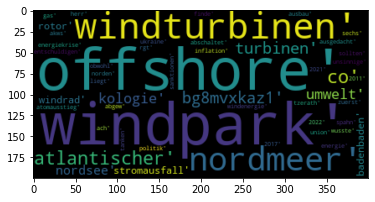

<Figure size 576x720 with 0 Axes>

In [101]:
words = []
for i in range(50): # starting 50 words
    words.append(list(vectorizer.vocabulary_.keys())[i])
create_wordcloud(str(words))

**Frequency Distribution of most commonly used words**

In [102]:
def common_words(dictionary):
    common_words = {}
    result = (sum(dictionary.values()) / len(dictionary)) # mean value of our dictionary 
    for key, value in sorted(dictionary.items()):
        if float(value) > result:
            common_words.update({key: float(value)})
    return common_words

In [103]:
commonwords = common_words(vectorizer.vocabulary_)

In [104]:
# The 100 common words
d = list(commonwords.items())[len(commonwords)-100:len(commonwords)]

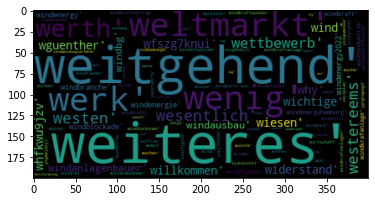

<Figure size 576x720 with 0 Axes>

In [105]:
create_wordcloud(str(d))

In [106]:
#  Graphics can not represent words in a good manner
# plt.bar(d.keys(),d.values(), align='center', color='blue')
# plt.ylabel('Frequency')
# plt.title('Most commonly used words')
# plt.show()

### With stopwords

In [108]:
from textblob import TextBlob
tweet_list_df[['polarity','subjectivity']] = tweet_list_df['Without stopwords'].apply(lambda Text: pd.Series(TextBlobDE(Text).sentiment))
for index, row in tweet_list_df['cleaned'].items():
    
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.333:
        tweet_list_df.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.333:
            tweet_list_df.loc[index,'sentiment'] = "positive"
    else:
            tweet_list_df.loc[index,'sentiment'] = "neutral"
tweet_list_df.loc[index,'neg'] = neg
tweet_list_df.loc[index,'pos'] = pos
tweet_list_df.loc[index,'neu'] = neu
tweet_list_df.loc[index,'compound'] = comp
    
tweet_list_df.head(5)

,text,cleaned,Without stopwords,polarity,subjectivity,sentiment,neg,pos,neu,compound
0,Offshore-Windpark mit Windturbinen im Nordmeer...,offshore windpark mit windturbinen im nordmeer...,offshore windpark windturbinen nordmeer atlant...,0.00,0.0,neutral,NaN,NaN,NaN,NaN
1,@jensspahn Ach Herr Spahn.\nIhre Union hat sic...,ach herr spahn ihre union hat sich 2011 diese...,ach herr spahn union 2011 atomausstieg ausgeda...,0.00,0.0,neutral,NaN,NaN,NaN,NaN
2,"@HubertAiwanger 1. Lützerath ist nicht ""der No...",1 tzerath ist nicht der norden sondern liegt ...,1 tzerath norden liegt westen 2 kohleverstromu...,-0.35,0.5,negative,NaN,NaN,NaN,NaN
3,"@HubertAiwanger Die Stromautobahnen, die #Wind...",die stromautobahnen die windenergie nach baye...,stromautobahnen windenergie bayern bringen sol...,-0.15,0.0,negative,NaN,NaN,NaN,NaN
4,Das war am 07.06.2016!!!!!\nDie Stromautobahne...,das war am 07 06 2016 die stromautobahnen die ...,07 06 2016 stromautobahnen windenergie bayern ...,-1.00,0.0,negative,NaN,NaN,NaN,NaN


In [109]:
# creating new data frames for all sentiments (positive,negative and neutal)
tweet_list_df_negative = tweet_list_df[tweet_list_df["sentiment"] == "negative"]
tweet_list_df_positive = tweet_list_df[tweet_list_df["sentiment"] == "positive"]
tweet_list_df_neutral = tweet_list_df[tweet_list_df["sentiment"] == "neutral"]

### Pie Chart

In [110]:
# count values for sentiments
count_values_in_column(tweet_list_df,"sentiment")

,Total,Percentage
neutral,108,63.91
negative,58,34.32
positive,3,1.78


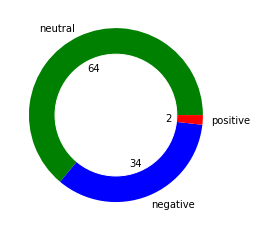

In [111]:
import matplotlib.pyplot as plt
#Create data for Pie Chart
pichart = count_values_in_column(tweet_list_df,"sentiment")
# names = pc.index
# size = pc["Percentage"]
names = pichart.index
values = pichart["Percentage"]

#Create a circle for the center of the plot
my_circle = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(values,labels = names, colors = ['green','blue','red'], autopct= lambda x: '{:.0f}'.format(x*values.sum()/100))
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Word Cloud

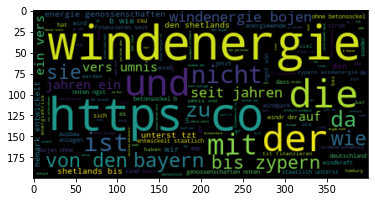

<Figure size 576x720 with 0 Axes>

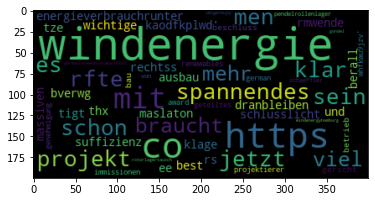

<Figure size 576x720 with 0 Axes>

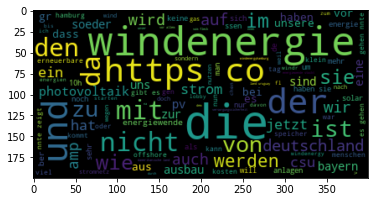

<Figure size 576x720 with 0 Axes>

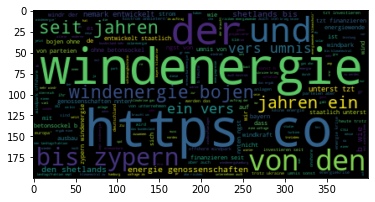

<Figure size 576x720 with 0 Axes>

In [112]:
create_wordcloud(str(tweet_list_df["cleaned"].values))
create_wordcloud(str(tweet_list_df_positive["cleaned"].values))
create_wordcloud(str(tweet_list_df_negative["cleaned"].values))
create_wordcloud(str(tweet_list_df_neutral["cleaned"].values))

### Text Insights 

In [113]:
#Calculating tweets lengths and word cound
tweet_list_df["text_len"] = tweet_list_df["cleaned"].astype(str).apply(len)
tweet_list_df["text_word_count"] = tweet_list_df["cleaned"].apply(lambda x: len(str(x).split()))

In [114]:
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,227.28
neutral,204.94
positive,191.67


In [115]:
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,34.02
neutral,28.87
positive,24.67


### Saving Output Tweets File To Drive

In [116]:
tweet_list_df.to_csv("./c2_sentimentanalysis_output.csv",sep=',',encoding='UTF-8')
tweet_list_df.head()

,text,cleaned,Without stopwords,polarity,subjectivity,sentiment,neg,pos,neu,compound,text_len,text_word_count
0,Offshore-Windpark mit Windturbinen im Nordmeer...,offshore windpark mit windturbinen im nordmeer...,offshore windpark windturbinen nordmeer atlant...,0.00,0.0,neutral,NaN,NaN,NaN,NaN,248,29
1,@jensspahn Ach Herr Spahn.\nIhre Union hat sic...,ach herr spahn ihre union hat sich 2011 diese...,ach herr spahn union 2011 atomausstieg ausgeda...,0.00,0.0,neutral,NaN,NaN,NaN,NaN,254,40
2,"@HubertAiwanger 1. Lützerath ist nicht ""der No...",1 tzerath ist nicht der norden sondern liegt ...,1 tzerath norden liegt westen 2 kohleverstromu...,-0.35,0.5,negative,NaN,NaN,NaN,NaN,265,40
3,"@HubertAiwanger Die Stromautobahnen, die #Wind...",die stromautobahnen die windenergie nach baye...,stromautobahnen windenergie bayern bringen sol...,-0.15,0.0,negative,NaN,NaN,NaN,NaN,123,19
4,Das war am 07.06.2016!!!!!\nDie Stromautobahne...,das war am 07 06 2016 die stromautobahnen die ...,07 06 2016 stromautobahnen windenergie bayern ...,-1.00,0.0,negative,NaN,NaN,NaN,NaN,245,40


### Clustering

In [117]:
#defining function for Tokenization
import re
def tokenization(text):
    tokens = re.split('\s',text)
    return tokens
# Applying function to the columns
tweet_list_df['tokenized'] = tweet_list_df["cleaned"].apply(lambda x:tokenization(x))
tweet_list_df.head()

,text,cleaned,Without stopwords,polarity,subjectivity,sentiment,neg,pos,neu,compound,text_len,text_word_count,tokenized
0,Offshore-Windpark mit Windturbinen im Nordmeer...,offshore windpark mit windturbinen im nordmeer...,offshore windpark windturbinen nordmeer atlant...,0.00,0.0,neutral,NaN,NaN,NaN,NaN,248,29,"[offshore, windpark, mit, windturbinen, im, no..."
1,@jensspahn Ach Herr Spahn.\nIhre Union hat sic...,ach herr spahn ihre union hat sich 2011 diese...,ach herr spahn union 2011 atomausstieg ausgeda...,0.00,0.0,neutral,NaN,NaN,NaN,NaN,254,40,"[, ach, herr, spahn, ihre, union, hat, sich, 2..."
2,"@HubertAiwanger 1. Lützerath ist nicht ""der No...",1 tzerath ist nicht der norden sondern liegt ...,1 tzerath norden liegt westen 2 kohleverstromu...,-0.35,0.5,negative,NaN,NaN,NaN,NaN,265,40,"[, 1, tzerath, ist, nicht, der, norden, sonder..."
3,"@HubertAiwanger Die Stromautobahnen, die #Wind...",die stromautobahnen die windenergie nach baye...,stromautobahnen windenergie bayern bringen sol...,-0.15,0.0,negative,NaN,NaN,NaN,NaN,123,19,"[, die, stromautobahnen, die, windenergie, nac..."
4,Das war am 07.06.2016!!!!!\nDie Stromautobahne...,das war am 07 06 2016 die stromautobahnen die ...,07 06 2016 stromautobahnen windenergie bayern ...,-1.00,0.0,negative,NaN,NaN,NaN,NaN,245,40,"[das, war, am, 07, 06, 2016, die, stromautobah..."


In [129]:
tweet_list_df["tokenized"].apply(lambda Text: nltk.FreqDist(Text))

0      {'offshore': 2, 'windpark': 2, 'mit': 1, 'wind...
1      {'': 2, 'ach': 1, 'herr': 1, 'spahn': 1, 'ihre...
2      {'': 2, '1': 1, 'tzerath': 1, 'ist': 1, 'nicht...
3      {'': 2, 'die': 2, 'stromautobahnen': 1, 'winde...
4      {'das': 2, 'war': 1, 'am': 1, '07': 1, '06': 1...
                             ...                        
164    {'vattenfall': 1, 'plant': 1, 'offshore': 2, '...
165    {'geplante': 1, 'windparks': 1, 'vor': 1, 'ort...
166    {'': 2, 'aber': 1, 'windenergie': 1, 'haben': ...
167    {'german': 1, 'renewables': 1, 'award': 1, '20...
168    {'das': 1, 'institut': 1, 'der': 3, 'deutschen...
Name: tokenized, Length: 169, dtype: object

In [119]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [120]:
# Defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
tweet_list_df['lemmatized'] = tweet_list_df['tokenized'].apply(lambda x: lemmatizer(x))
tweet_list_df.head()

,text,cleaned,Without stopwords,polarity,subjectivity,sentiment,neg,pos,neu,compound,text_len,text_word_count,tokenized,lemmatized
0,Offshore-Windpark mit Windturbinen im Nordmeer...,offshore windpark mit windturbinen im nordmeer...,offshore windpark windturbinen nordmeer atlant...,0.00,0.0,neutral,NaN,NaN,NaN,NaN,248,29,"[offshore, windpark, mit, windturbinen, im, no...","[offshore, windpark, mit, windturbinen, im, no..."
1,@jensspahn Ach Herr Spahn.\nIhre Union hat sic...,ach herr spahn ihre union hat sich 2011 diese...,ach herr spahn union 2011 atomausstieg ausgeda...,0.00,0.0,neutral,NaN,NaN,NaN,NaN,254,40,"[, ach, herr, spahn, ihre, union, hat, sich, 2...","[, ach, herr, spahn, ihre, union, hat, sich, 2..."
2,"@HubertAiwanger 1. Lützerath ist nicht ""der No...",1 tzerath ist nicht der norden sondern liegt ...,1 tzerath norden liegt westen 2 kohleverstromu...,-0.35,0.5,negative,NaN,NaN,NaN,NaN,265,40,"[, 1, tzerath, ist, nicht, der, norden, sonder...","[, 1, tzerath, ist, nicht, der, norden, sonder..."
3,"@HubertAiwanger Die Stromautobahnen, die #Wind...",die stromautobahnen die windenergie nach baye...,stromautobahnen windenergie bayern bringen sol...,-0.15,0.0,negative,NaN,NaN,NaN,NaN,123,19,"[, die, stromautobahnen, die, windenergie, nac...","[, die, stromautobahnen, die, windenergie, nac..."
4,Das war am 07.06.2016!!!!!\nDie Stromautobahne...,das war am 07 06 2016 die stromautobahnen die ...,07 06 2016 stromautobahnen windenergie bayern ...,-1.00,0.0,negative,NaN,NaN,NaN,NaN,245,40,"[das, war, am, 07, 06, 2016, die, stromautobah...","[da, war, am, 07, 06, 2016, die, stromautobahn..."


In [121]:
import itertools
merged = list(itertools.chain(*tweet_list_df['lemmatized']))
merged

['offshore',
 'windpark',
 'mit',
 'windturbinen',
 'im',
 'nordmeer',
 'atlantischer',
 'http',
 'co',
 'bg8mvxkaz1',
 'windpark',
 'offshore',
 'turbinen',
 'kologie',
 'umwelt',
 'nordsee',
 'stromausfall',
 'badenbaden',
 'windrad',
 'windrad',
 'rotor',
 'windenergie',
 'energie',
 'energiekrise',
 'gas',
 'tanken',
 'inflation',
 'ukraine',
 'sanktionen',
 '',
 'ach',
 'herr',
 'spahn',
 'ihre',
 'union',
 'hat',
 'sich',
 '2011',
 'diesen',
 'atomausstieg',
 'ausgedacht',
 'ihre',
 'union',
 '2017',
 'den',
 'windenergie',
 'ausbau',
 'abgew',
 'rgt',
 'obwohl',
 'sie',
 'wusste',
 'das',
 'man',
 '2021',
 '2022',
 'sechs',
 'akws',
 'abschaltet',
 'ich',
 'finde',
 'sie',
 'sollten',
 'sich',
 'zuerst',
 'r',
 'diese',
 'unsinnige',
 'politik',
 'entschuldigen',
 '',
 '',
 '1',
 'tzerath',
 'ist',
 'nicht',
 'der',
 'norden',
 'sondern',
 'liegt',
 'im',
 'westen',
 '2',
 'kohleverstromung',
 'wird',
 'nicht',
 'ausgeweitet',
 'kohleausstieg',
 'wird',
 'um',
 '8',
 'jahre',
 '

# Evaluate Models

In [122]:
# Clustering with Kmeans (first model)
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

cv = CountVectorizer(analyzer= 'word', max_features= 5000, lowercase = True, preprocessor= None, tokenizer=None, stop_words= stopwords.words('german'))
vectors = cv.fit_transform(merged)
kmean = KMeans(n_clusters=3, init= 'k-means++', random_state= 0)
kmean_indices = kmean.fit_predict(vectors)
pca = PCA(n_components = 2)
scatter_plot_points = pca.fit_transform(vectors.toarray())
colors = ["r","b","c","y","m"]
x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x_axis, y_axis, c = [colors[d] for d in kmean_indices])

for i,txt in enumerate(merged):
    ax.annotate(txt, (x_axis[i], y_axis[i]))

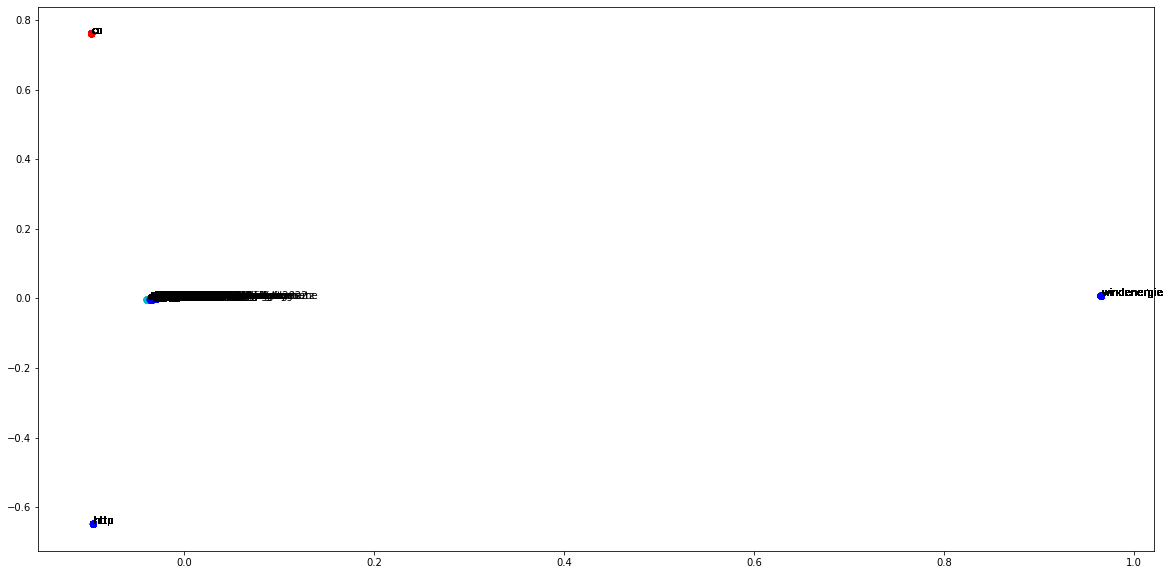

In [123]:
# #training k-means model
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=4)
# kmeans.fit(data)

# #predictions from kmeans
# pred = kmeans.predict(data)
# frame = pd.DataFrame(data)
# frame['cluster'] = pred
# frame.columns = ['Weight', 'Height', 'cluster']

# #plotting results
# color=['blue','green','cyan', 'black']
# for k in range(0,4):
#     data = frame[frame["cluster"]==k]
#     plt.scatter(data["Weight"],data["Height"],c=color[k])
# plt.show()

In [124]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
GMM_labels = gmm.fit(vectors.toarray())

# #predictions from gmm
# labels = gmm.predict(data)
# frame = pd.DataFrame(data)
# frame['cluster'] = labels
# frame.columns = ['Weight', 'Height', 'cluster']

# color=['blue','green','cyan', 'black']
# for k in range(0,4):
#     data = frame[frame["cluster"]==k]
#     plt.scatter(data["Weight"],data["Height"],c=color[k])
# plt.show()

# pca = PCA(n_components = 2)
# scatter_plot_points = pca.fit_transform(vectors.toarray())
# colors = ["r","b","c","y","m"]
# x_axis = [o[0] for o in scatter_plot_points]
# y_axis = [o[1] for o in scatter_plot_points]
# fig, ax = plt.subplots(figsize=(20,10))
# ax.scatter(x_axis, y_axis, c = [colors[d] for d in kmean_indices])

# for i,txt in enumerate(merged):
#     ax.annotate(txt, (x_axis[i], y_axis[i]))




In [ ]:
# Clustering with Spectral clustering
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=4).fit(vectors)

In [ ]:
# # Visualising the clusters
# labels = sc.labels_

# plt.scatter(x[:,0], x[:,1], c=labels)
# plt.show()

In [ ]:
# code to visualize spectral clustering
# f = plt.figure()
# f.add_subplot(2, 2, 1)
# for i in range(2, 6):
#  sc = SpectralClustering(n_clusters=i).fit(x)
#  f.add_subplot(2, 2, i-1)
#  plt.scatter(x[:,0], x[:,1], s=5, c=sc.labels_, label="n_cluster-"+str(i))
#  plt.legend()

# plt.show()

### Helper

In [ ]:
def get_sections(text):
    spacy_text = nlp(text)
    return spacy_text.text.split("\n")

def get_sentence(text):
    spacy_text = nlp(text)
    sents = []
    for sent in spacy_text.sents:
        sents.append(sent.text)
    return sents

def remove_stopwords(text):
    if (str(text) == "nan"):
        return None
    spacy_text = nlp(text)
    return " ".join([str(t) for t in spacy_text if not t.is_stop])

# a lot of commented code was here

def lemmatizer(text):
    spacy_text = remove_stopwords2(text)

    doc = nlp(spacy_text)
    text_without_stopwords = []
    for token in spacy_text.doc:
        if (token.is_alpha):
            text_without_stopwords.append(token.lemma_)
    
    return " ".join(text_without_stopwords) 


### Comparison

In [ ]:
def compare_texts_cleaned(comp_a, comp_b):
    if max([len(comp_a), len(comp_b)]) == 0:
        return 0
    comp_a = set(lemmatizer(remove_stopwords(comp_a)).split())
    comp_b = set(lemmatizer(remove_stopwords(comp_b)).split())
    return len(comp_a.intersection(comp_b))/ max([len(comp_a), len(comp_b)])


def compare_texts(comp_a, comp_b):
        if max([len(comp_a), len(comp_b)]) == 0:
            return 0
        comp_a = set(lemmatizer(comp_a).split())
        comp_b = set(lemmatizer(comp_b).split())
        return len(comp_a.intersection(comp_b)) / max([len(comp_a), len(comp_b)])
    
def compare_text_meaning(comp_a, comp_b):
        comp_a = nlp(comp_a)
        comp_b = nlp(comp_b)
        return comp_a.similarity(comp_b)
    
def compare_text_meaning_cleaned(comp_a, comp_b):
        comp_a = nlp(comp_a)
        comp_b = nlp(comp_b)
        comp_a = nlp(' '.join([str(t) for t in comp_a if not t.is_stop]))
        comp_b = nlp(' '.join([str(t) for t in comp_b if not t.is_stop]))
        return comp_a.similarity(comp_b)


# Final model